In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import json
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from scipy.stats import uniform
from collections import Counter
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
dfsignal_mn = pd.read_csv("signal-data.csv") 
dfsignal_mn.shape

(1567, 592)

In [3]:
dfsignal_mn.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [4]:
dfsignal_mn.describe()
dfsignal= dfsignal_mn.drop(["Time"], axis = 1)

* For feature 2 we can analyze that our 25th Percentile is 2181.044  i.e 2181 which means 25% of the data is less than 2181. The 75th Percentile value is 2218 meaning 75% of data lies below 2218. Here note is that there is a no difference between the 75 percentile value and maximum value which can be interpreted as the 2 feature is not skewed and follow a Normal Distribution.
* For feature 6 we can analyze that our 25th Percentile is 2.306 i.e 2 which means 25% of the data is less than 2. The 75th Percentile value is 3.295 i.e 3 meaning 75% of data lies below 3. One major thing to note is that there is a major difference between the 75 percentile value and maximum value which can be interpreted as the 6 feature is highly skewed and does not follow a Normal Distribution.
* For feature 589 we can analyze that our 25th Percentile is 71.900 i.e 72 which means 25% of the data is less than 72. The 75th Percentile value is 737.304 i.e 3 meaning 75% of data lies below 737. One major thing to note is that there is a major difference between the 75 percentile value and maximum value which can be interpreted as the 589 feature is highly skewed and does not follow a Normal Distribution.

In [5]:
percent_missing = dfsignal.isnull().sum() * 100 / len(dfsignal)
print(len(percent_missing))
missing_value_df = pd.DataFrame({'column_name': dfsignal.columns,
                                 'percent_missing': percent_missing})
for x in missing_value_df.column_name:        
        nrows=missing_value_df.percent_missing.loc[x]
        if nrows>20:
            dfsignal.drop(x, axis=1, inplace=True)
        elif (nrows>0) & (nrows<20):
            mean_value=dfsignal[x].mean()
            dfsignal[x].fillna(value=mean_value, inplace=True)

591


In [6]:
dfsignal

0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235   

             8         9  ...      577     582     583     584      585  \
0     1.500500  0.016200  ...  14.9509  0.5005  0.0118  0.0035   2.3630   
1     1.496600 -0.000500  ...  10.9003  0.5019  0.0223  0.0055   4.4447   
2     1.443600  0.004100  ...   9.2721  0.4958  0.0157  0.0039   3.1745   
3     1.488200 -0.012400  ...   8.5831  0.4990  0.0103  0.0025   2.0544   
4     1.503100 -0.003100  ...  10.9698  0.4800  0.4766  0.1045  99.3032   
...        ...       ...  ...      ...     ...     ...     ...      ...   
1562  1.342400 -0.004500  ...  11.7256  0.4988  0.0143  0.0039   2.8669   
1563  1.433300 -0.006100  ...  17.8379  0.4975  0.0131  0.0036   2.6238   
1564  1.462862 -0.000841  ...  17.7267  0.4987  0.0153  0.0041   3.0590   
1565  1.462200 -0.007200  ...  19.2104  0.5004  0.0178  0.0038   3.5662   
1566  1.462862 -0.000841  ...  22.9183  0.4987  0.0181  0.0040   3.6275   

           586       587       588         589  Pass/Fail  
0     0.021458  0.016475  0.005283   99.670066         -1  
1     0.009600  0.020100  0.006000  208.204500         -1  
2     0.058400  0.048400  0.014800   82.860200          1  
3     0.020200  0.014900  0.004400   73.843200         -1  
4     0.020200  0.014900  0.004400   73.843200         -1  
...        ...       ...       ...         ...        ...  
1562  0.006800  0.013800  0.004700  203.172000         -1  
1563  0.006800  0.013800  0.004700  203.172000         -1  
1564  0.019700  0.008600  0.002500   43.523100         -1  
1565  0.026200  0.024500  0.007500   93.494100         -1  
1566  0.011700  0.016200  0.004500  137.784400         -1  

[1567 rows x 559 columns]

In [7]:
nunique = dfsignal.nunique()
cols_to_drop = nunique[nunique == 1].index
dfsignal.drop(cols_to_drop, axis=1,inplace=True)

In [8]:
nunique = dfsignal.nunique()
cols_to_drop = nunique[nunique <= 26].index
dfsignal.drop(cols_to_drop[:-1], axis=1,inplace=True)

* dropping those column which has most of the values are  0.0    

In [9]:
corr = dfsignal.corr()

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = dfsignal.columns[columns]
data_selected = dfsignal[selected_columns]

* We the dataset has only those columns with correlation less than 0.9

In [10]:
data_selected.shape

(1567, 247)

In [11]:
selected_columns = selected_columns[:-1]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y,x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x,columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(data_selected.iloc[:,:-1].values, data_selected.iloc[:,-1].values, SL, selected_columns)

* We assume to null hypothesis to be “The selected combination of dependent variables do not have any effect on the independent variable”.
* Then we build a small regression model and calculate the p values.
* If the p values is higher than the threshold, we discard that combination of features.

In [12]:
result = pd.DataFrame()
result['Pass/Fail'] = data_selected.iloc[:,-1]

In [13]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)
data['Pass/Fail']=dfsignal['Pass/Fail']
data

14      25      26       32       34       36        43  \
0      7.955800  0.8955  1.7730  83.3971  50.6170  49.3830  352.7173   
1     10.154800  1.2973  2.0143  84.9052  50.6596  49.3404  352.2445   
2      9.515700  1.3122  2.0295  84.7569  50.1530  49.8470  364.3782   
3      9.605200  1.3137  2.0038  84.9105  50.5100  49.4900  363.0273   
4     10.566100  1.2887  1.9912  86.3269  50.2480  49.7520  353.3400   
...         ...     ...     ...      ...      ...      ...       ...   
1562  11.769200  1.2817  1.9540  83.8405  50.2482  49.7518  369.9009   
1563   9.162000  1.0870  1.8023  84.0623  50.2067  49.7934  351.4055   
1564   9.005371  1.2930  1.9435  85.8638  50.9333  49.0667  350.3145   
1565   9.735400  1.2875  1.9880  84.5602  50.6547  49.3453  370.5845   
1566   9.005371  1.3020  2.0085  83.3424  50.1940  49.8060  362.8100   

            48     53      56  ...       216      473         488       510  \
0     141.2282  4.592  0.9317  ...  0.030100  24.7625   53.109800   64.6707   
1     145.8445  4.590  0.9324  ...  0.073400  19.4865  194.437100  141.4365   
2     141.0845  4.486  0.9139  ...  0.034900  31.4674  191.758200  240.7767   
3     142.5427  4.486  0.9139  ...  0.064300  37.8979    0.000000  113.5593   
4     138.0882  4.624  0.9298  ...  0.092400  17.0927  748.178100  148.0663   
...        ...    ...     ...  ...       ...      ...         ...       ...   
1562  138.0482  4.658  0.9204  ...  0.083484  44.6402  352.616477   53.1915   
1563  132.9045  4.585  0.9255  ...  0.083484  19.9953  352.616477   29.4372   
1564  142.8818  4.596  0.9353  ...  0.083484  43.2736  352.616477   54.8330   
1565  141.9164  4.584  0.9207  ...  0.083484  47.1291  352.616477   78.4993   
1566  134.0300  4.594  0.9187  ...  0.083484  67.9605  352.616477   75.8621   

           511     548         562       563      565  Pass/Fail  
0       0.0000  75.752  262.729683  0.679641  0.14561         -1  
1       0.0000  74.640  262.729683  0.679641  0.14561         -1  
2     244.2748  74.654  267.064000  0.903200  0.62190          1  
3       0.0000  72.442  268.228000  0.651100  0.16300         -1  
4       0.0000  79.156  262.729683  0.679641  0.14561         -1  
...        ...     ...         ...       ...      ...        ...  
1562  235.7895  77.166  264.272000  0.567100  0.08770         -1  
1563  700.0000  73.254  266.832000  0.625400  0.13080         -1  
1564    0.0000  74.156  256.730000  0.820900  0.23880         -1  
1565  456.4103  73.254  264.272000  0.567100  0.08770         -1  
1566  317.6471  73.254  257.974000  0.619300  0.13070         -1  

[1567 rows x 42 columns]

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vdata=data.iloc[:,:-1]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vdata.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(vdata.values, i)
                          for i in range(len(vdata.columns))]
print(vif_data)

   feature           VIF
0       14     11.940702
1       25    175.238074
2       26    370.540041
3       32   4277.068869
4       34  28530.171887
5       36  23937.778768
6       43  14968.616875
7       48   2921.908537
8       53  20422.087557
9       56  85523.680820
10      59      2.766615
11      63     24.384985
12      64    174.105387
13      65    115.024502
14      67      6.543354
15      68   3129.395142
16      75      1.281316
17      99      1.056646
18     129      1.526284
19     130    117.767869
20     132   2852.928821
21     145      7.100128
22     155      1.270957
23     166      7.571273
24     177      3.266166
25     195      1.659703
26     197     30.620512
27     202     14.838115
28     203     35.090705
29     210      6.954719
30     211      6.506080
31     214      3.813443
32     216     13.165876
33     473     10.133082
34     488      3.363852
35     510      3.762699
36     511      1.756403
37     548    709.338569
38     562   1619.714766


In [15]:
vdata.drop(vif_data['feature'][vif_data['VIF']>=10],axis=1, inplace=True)

In [16]:
vdata

59      67        75      99       129       145   155  166    177  \
0     -1.7264  0.9226  0.012600 -0.0251 -0.047300  0.085000  0.41  2.0  0.160   
1      0.8073  1.1598 -0.003900 -0.0158 -0.094600  0.060000  0.35  2.2  0.325   
2     23.8245  0.8694 -0.007800  0.1218 -0.189200  0.048300  0.47  2.1  0.326   
3     24.3791  0.9761 -0.055500 -0.0195  0.283800  0.039300  0.35  1.7  0.390   
4    -12.2945  0.9256 -0.053400 -0.0167 -0.567700  0.045100  0.43  3.9  0.922   
...       ...     ...       ...     ...       ...       ...   ...  ...    ...   
1562   2.8182  0.9923 -0.006903  0.0884  0.000000  0.032200  0.23  5.9  0.159   
1563  -3.3555  0.4904 -0.006903 -0.0372 -0.141900  0.046800  0.28  2.7  0.414   
1564   1.1664  0.9078 -0.006903 -0.0177 -0.554228  0.063621  0.29  3.2  0.790   
1565   4.4682  0.9981 -0.006903  0.1451 -0.993400  0.034100  0.24  2.2  0.271   
1566   1.8718  0.9683 -0.006903 -0.0632 -0.554228  0.063621  0.23  3.9  0.465   

        195       210       211       214         488       510       511  \
0     0.292  0.077200  0.059900  0.070400   53.109800   64.6707    0.0000   
1     0.222  0.056600  0.048800  0.046800  194.437100  141.4365    0.0000   
2     0.139  0.033900  0.049400  0.040100  191.758200  240.7767  244.2748   
3     0.139  0.124800  0.046300  0.070800    0.000000  113.5593    0.0000   
4     0.250  0.091500  0.050600  0.079700  748.178100  148.0663    0.0000   
...     ...       ...       ...       ...         ...       ...       ...   
1562  0.088  0.088866  0.056755  0.083268  352.616477   53.1915  235.7895   
1563  0.249  0.088866  0.056755  0.083268  352.616477   29.4372  700.0000   
1564  0.205  0.088866  0.056755  0.083268  352.616477   54.8330    0.0000   
1565  0.523  0.088866  0.056755  0.083268  352.616477   78.4993  456.4103   
1566  0.181  0.088866  0.056755  0.083268  352.616477   75.8621  317.6471   

          565  
0     0.14561  
1     0.14561  
2     0.62190  
3     0.16300  
4     0.14561  
...       ...  
1562  0.08770  
1563  0.13080  
1564  0.23880  
1565  0.08770  
1566  0.13070  

[1567 rows x 17 columns]

* VIF exceeding 10 indicates high multicollinearity between this independent variable and the others
* Dropping one of the correlated features will help in bringing down the multicollinearity between correlated features

In [17]:
vif_data_new = pd.DataFrame()

vif_data_new["feature"] = vdata.columns
  
# calculating VIF for each feature
vif_data_new["VIF"] = [variance_inflation_factor(vdata.values, i)
                          for i in range(len(vdata.columns))]
print(vif_data_new)

   feature       VIF
0       59  1.694078
1       67  1.362284
2       75  1.217979
3       99  1.024910
4      129  1.292777
5      145  5.873489
6      155  1.253031
7      166  5.951414
8      177  3.001032
9      195  1.506853
10     210  6.263840
11     211  5.567122
12     214  3.680005
13     488  2.807252
14     510  3.269180
15     511  1.692072
16     565  4.506259


In [18]:
vdata['Pass/Fail']=dfsignal['Pass/Fail']
data=vdata

<AxesSubplot:>

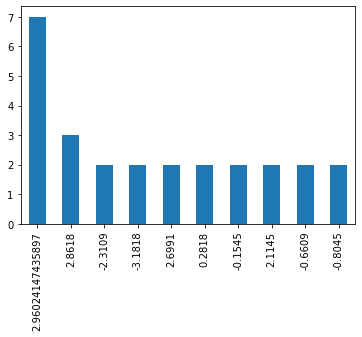

In [19]:
data['59'].value_counts().head(10).plot.bar()

* From the above plot we observe that in Feature 59 the value 2.9702 occurs higher than other values 

<AxesSubplot:>

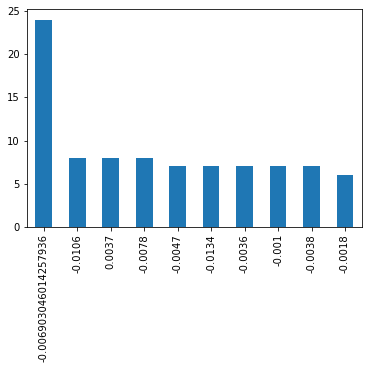

In [20]:
data['75'].value_counts().head(10).plot.bar()

* From the above plot we observe that in Feature 75 the value -0.0069 occurs higher than other values

<AxesSubplot:>

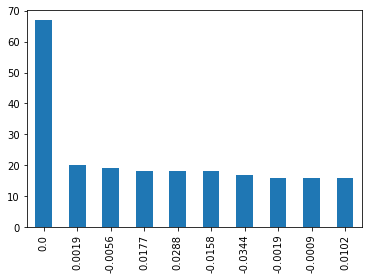

In [21]:
data['99'].value_counts().head(10).plot.bar()

* From the above plot we observe that in Feature 99 the value occurs0.0 more then the others

<AxesSubplot:>

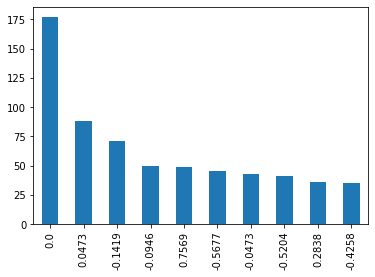

In [22]:
data['129'].value_counts().head(10).plot.bar()

* From the above plot we observe that in Feature 129 the 0.0 value occurs more then the others

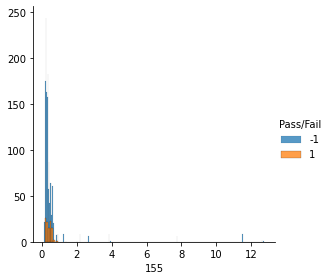

In [23]:
sns.FacetGrid(data,hue='Pass/Fail',height=4).map(sns.histplot,"155").add_legend()

* From the above graph we observe that in Feature 155 Pass rate is high as compare Fail  

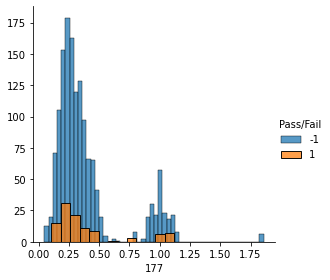

In [24]:
sns.FacetGrid(data,hue='Pass/Fail',height=4).map(sns.histplot,"177").add_legend()

* From the above graph we observe that in Feature 177 Pass rate is high as compare Fail rate 

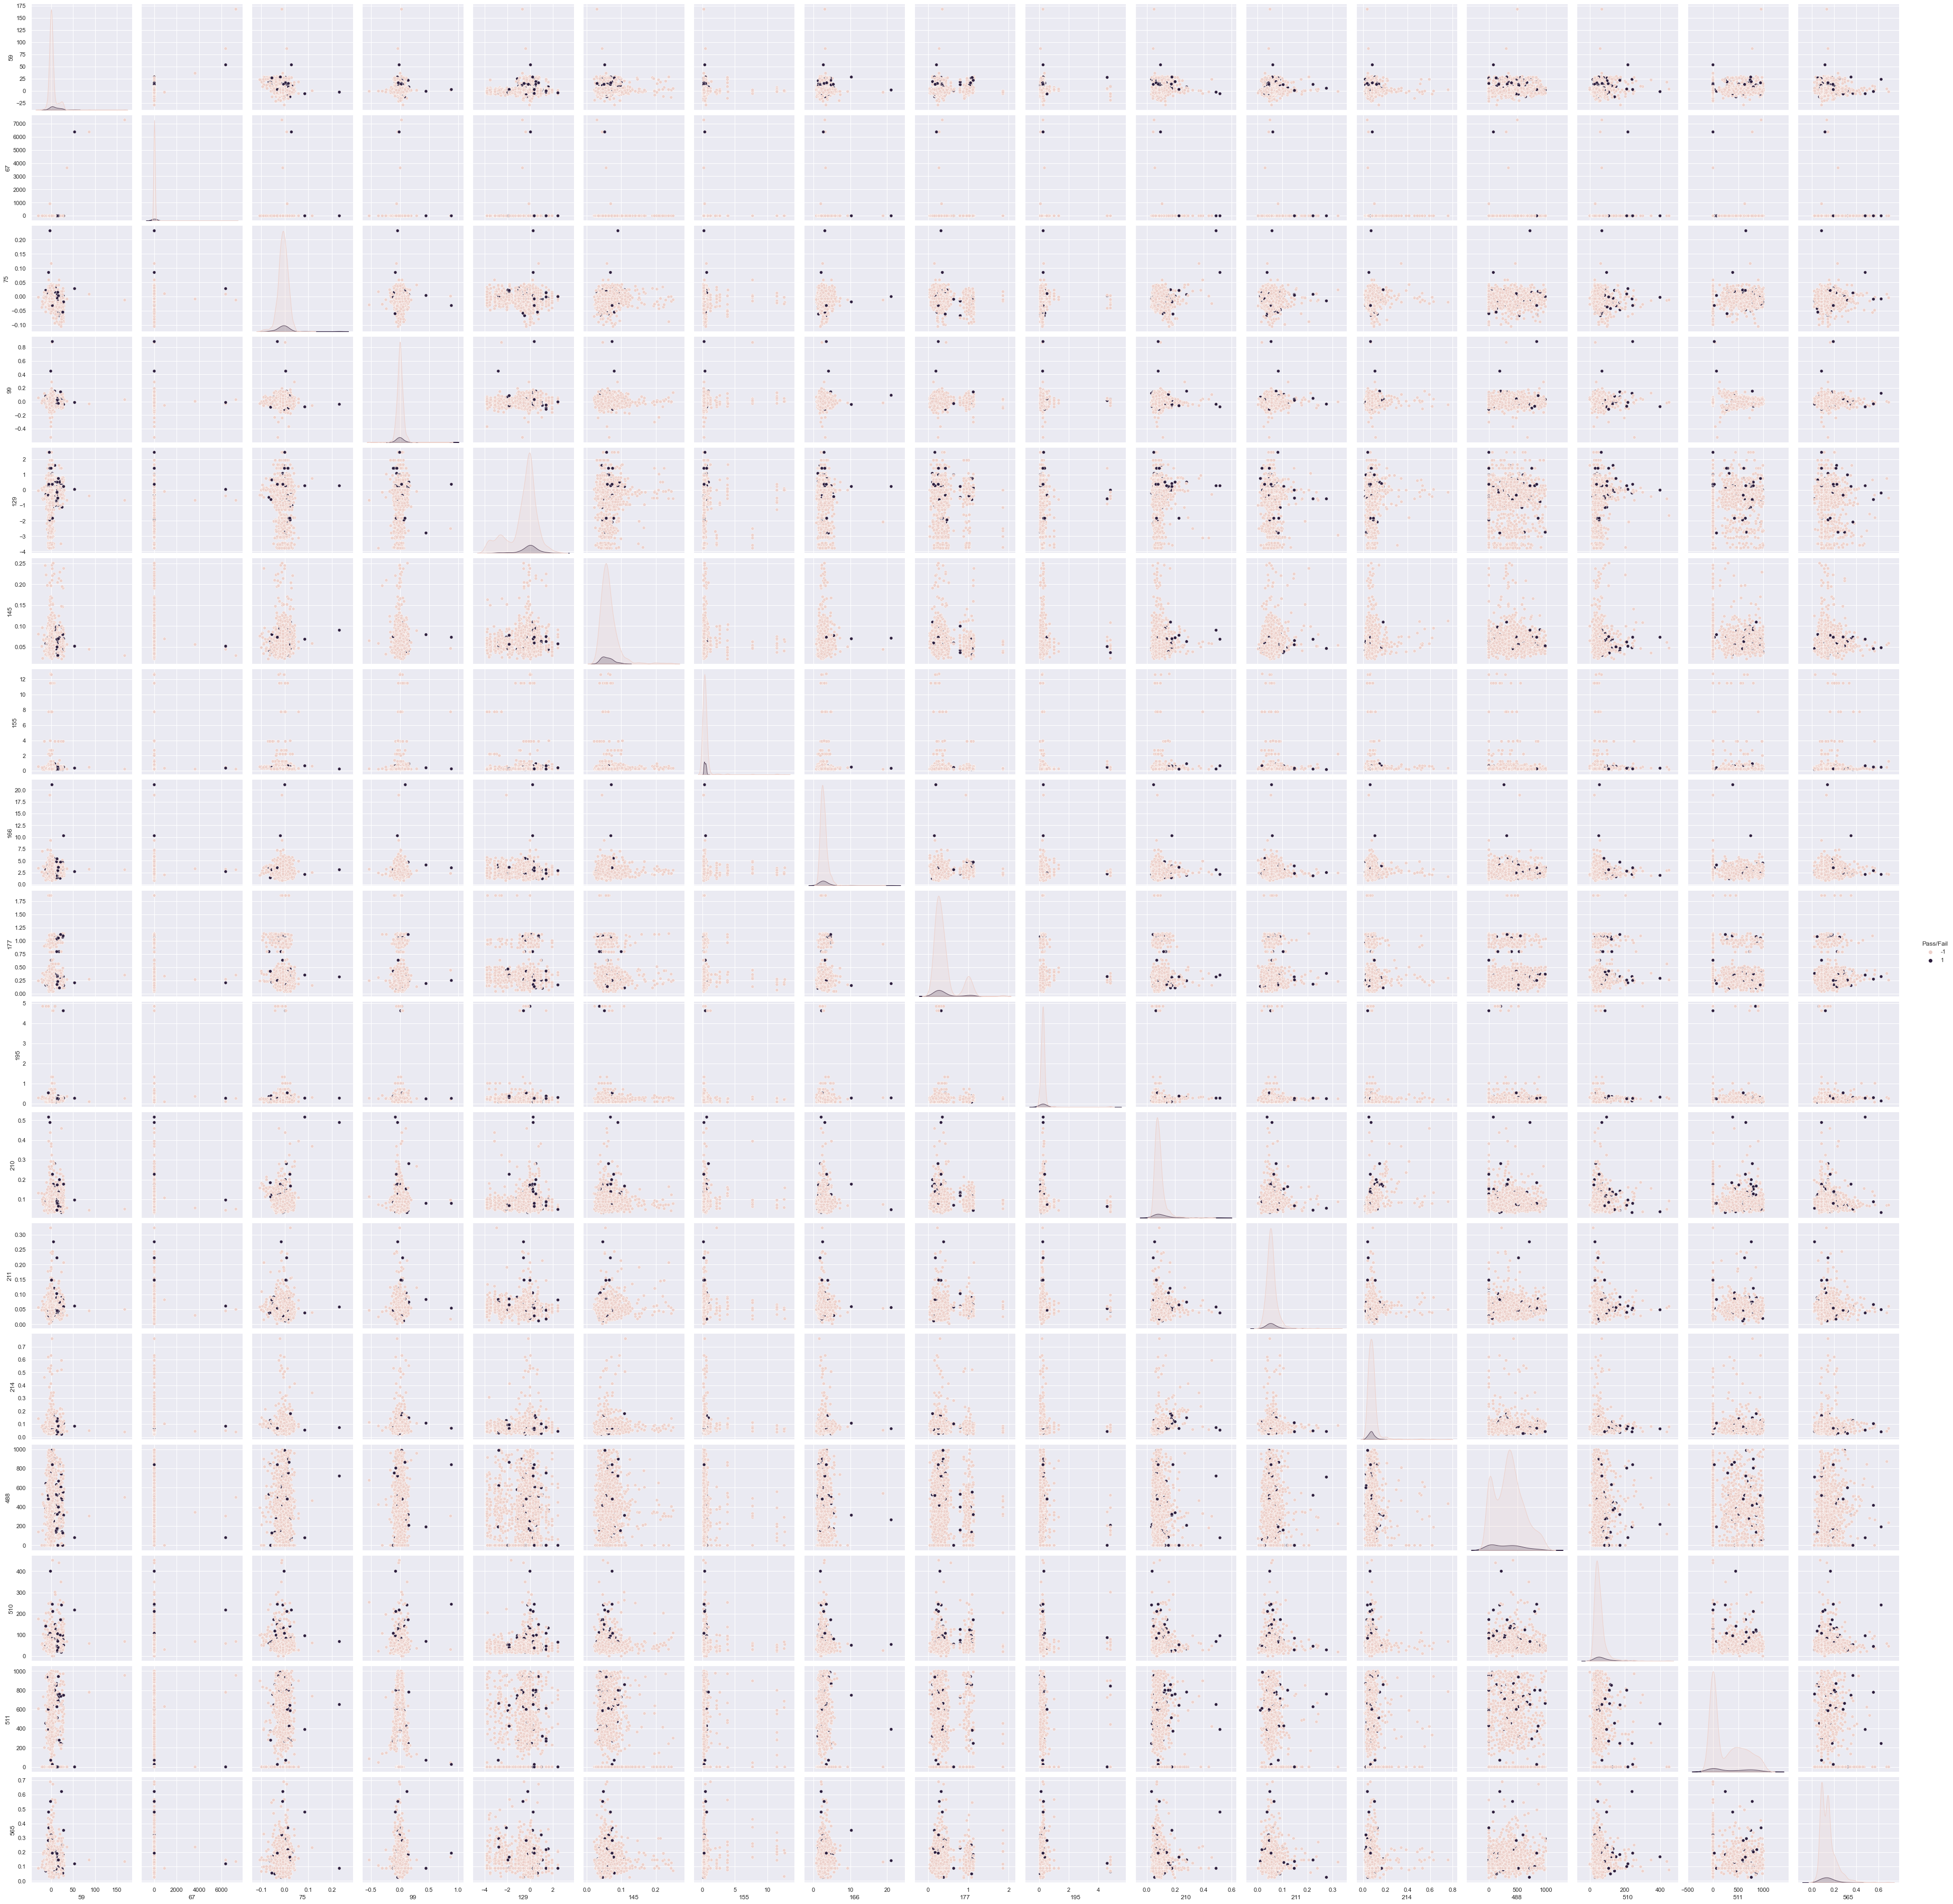

In [25]:
sns.set()
sns.pairplot(data, height = 3,hue="Pass/Fail")
plt.show();

* From the above plot we observe that all Feature combination contains more Pass then the Fail
* There is imabalance in Feature 'Pass/Fail' which may create classification predictive modeling problem where the distribution of examples across the classes is not equal.
* No Feature Shows any Strog postive or Negetive realtionship

In [26]:
data["Pass/Fail"].replace(-1,0,inplace=True)

In [27]:
data

59      67        75      99       129       145   155  166    177  \
0     -1.7264  0.9226  0.012600 -0.0251 -0.047300  0.085000  0.41  2.0  0.160   
1      0.8073  1.1598 -0.003900 -0.0158 -0.094600  0.060000  0.35  2.2  0.325   
2     23.8245  0.8694 -0.007800  0.1218 -0.189200  0.048300  0.47  2.1  0.326   
3     24.3791  0.9761 -0.055500 -0.0195  0.283800  0.039300  0.35  1.7  0.390   
4    -12.2945  0.9256 -0.053400 -0.0167 -0.567700  0.045100  0.43  3.9  0.922   
...       ...     ...       ...     ...       ...       ...   ...  ...    ...   
1562   2.8182  0.9923 -0.006903  0.0884  0.000000  0.032200  0.23  5.9  0.159   
1563  -3.3555  0.4904 -0.006903 -0.0372 -0.141900  0.046800  0.28  2.7  0.414   
1564   1.1664  0.9078 -0.006903 -0.0177 -0.554228  0.063621  0.29  3.2  0.790   
1565   4.4682  0.9981 -0.006903  0.1451 -0.993400  0.034100  0.24  2.2  0.271   
1566   1.8718  0.9683 -0.006903 -0.0632 -0.554228  0.063621  0.23  3.9  0.465   

        195       210       211       214         488       510       511  \
0     0.292  0.077200  0.059900  0.070400   53.109800   64.6707    0.0000   
1     0.222  0.056600  0.048800  0.046800  194.437100  141.4365    0.0000   
2     0.139  0.033900  0.049400  0.040100  191.758200  240.7767  244.2748   
3     0.139  0.124800  0.046300  0.070800    0.000000  113.5593    0.0000   
4     0.250  0.091500  0.050600  0.079700  748.178100  148.0663    0.0000   
...     ...       ...       ...       ...         ...       ...       ...   
1562  0.088  0.088866  0.056755  0.083268  352.616477   53.1915  235.7895   
1563  0.249  0.088866  0.056755  0.083268  352.616477   29.4372  700.0000   
1564  0.205  0.088866  0.056755  0.083268  352.616477   54.8330    0.0000   
1565  0.523  0.088866  0.056755  0.083268  352.616477   78.4993  456.4103   
1566  0.181  0.088866  0.056755  0.083268  352.616477   75.8621  317.6471   

          565  Pass/Fail  
0     0.14561          0  
1     0.14561          0  
2     0.62190          1  
3     0.16300          0  
4     0.14561          0  
...       ...        ...  
1562  0.08770          0  
1563  0.13080          0  
1564  0.23880          0  
1565  0.08770          0  
1566  0.13070          0  

[1567 rows x 18 columns]

In [28]:
Prd=data.iloc[:,0:-1]
tr=data.iloc[:,-1]

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

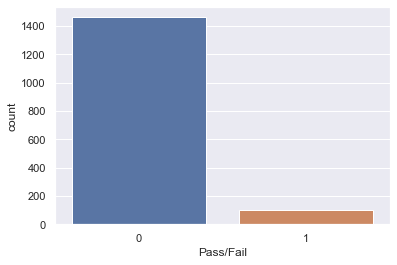

In [29]:
sns.countplot(x=tr,data=data)

In [30]:
X_train,X_test, Y_train, Y_test = train_test_split(Prd, tr, test_size=0.20, random_state=2)

In [31]:
from scipy.stats import f_oneway
data1 =Prd
data2 = X_train
data3 = X_test
stat, p = f_oneway(data1, data2, data3)
print('P value:',p)
if p.all() > 0.05:
    print('The train data and test data is same distribution of original data')
else:
    print('The train data and data test is different distributions of original data')

P value: [0.83350701 0.88948718 0.33192932 0.57916996 0.29497177 0.5124327
 0.98669001 0.08696235 0.88753047 0.73754534 0.39086373 0.67589483
 0.93649239 0.05699728 0.91314248 0.53251251 0.69272075]
The train data and test data is same distribution of original data


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [33]:
knn = KNeighborsClassifier()
knn.fit(x_train_scale, Y_train)

KNeighborsClassifier()

In [34]:
Xtrain_predict = knn.predict(x_train_scale)
Xtest_predict = knn.predict(x_test_scale)

In [35]:
print("Model Accuracy on Train data: {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict)))
print("Model Accuracy on test data: {0:.2f}".format(accuracy_score(Y_test, Xtest_predict)))

Model Accuracy on Train data: 0.93
Model Accuracy on test data: 0.94


In [36]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [37]:
#GridSearchCV tuning parameter
gs_param = GridSearchCV(knn,param_grid,cv=2)
gs_param.fit(x_train_scale, Y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [38]:
print(gs_param.best_params_)

{'algorithm': 'auto', 'n_neighbors': 6}


In [39]:
Xtrain_predict_gs = gs_param.predict(x_train_scale)
Xtest_predict_gs = gs_param.predict(x_test_scale)

In [40]:
print("GridSearchCV Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_gs)))
print("GridSearchCV Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_gs)))

GridSearchCV Model Accuracy on Train data After tuning : 0.93
GridSearchCV Model Accuracy on test data After tuning : 0.94


In [41]:
#RandomizedSearchCV tuning parameter
k_range=list(range(1,9))
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)

In [42]:
randomCV_param = RandomizedSearchCV(knn,param_distributions=param_dist, n_iter=12, scoring='accuracy', n_jobs=-1, random_state=1)

In [43]:
randomCV_param.fit(x_train_scale, Y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(), n_iter=12, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   random_state=1, scoring='accuracy')

In [44]:
Xtrain_predict_rand = randomCV_param.predict(x_train_scale)
Xtest_predict_rand = randomCV_param.predict(x_test_scale)

In [45]:
print("RandomizedSearchCV Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_rand)))
print("RandomizedSearchCV Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_rand)))

RandomizedSearchCV Model Accuracy on Train data After tuning : 1.00
RandomizedSearchCV Model Accuracy on test data After tuning : 0.94


In [46]:
from sklearn import preprocessing

# normalize the data attributes
normalized_train = preprocessing.normalize(X_train)
normalized_test= preprocessing.normalize(X_test)

In [47]:
knn = KNeighborsClassifier()
knn.fit(normalized_train, Y_train)

KNeighborsClassifier()

In [48]:
Xtrain_predict1 = knn.predict(normalized_train)
Xtest_predict1 = knn.predict(normalized_test)

In [49]:
print("Model Accuracy on Train data: {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict1)))
print("Model Accuracy on test data: {0:.2f}".format(accuracy_score(Y_test, Xtest_predict1)))

Model Accuracy on Train data: 0.93
Model Accuracy on test data: 0.94


In [50]:
# evaluate accuracy
print("The final model accuracy score{0:.2f}".format(accuracy_score(Y_test, Xtest_predict1)))
print("The final model recall score {0:.2f}".format(recall_score(Y_test, Xtest_predict1)))
print("The final model precision score {0:.2f}".format(precision_score(Y_test, Xtest_predict1)))
print();
print(classification_report(Y_test,Xtest_predict1,labels=[1, 0]))

The final model accuracy score0.94
The final model recall score 0.00
The final model precision score 0.00

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           0       0.94      1.00      0.97       294

    accuracy                           0.94       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.88      0.94      0.91       314



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.p

In [51]:
data.describe()

59           67           75          99          129  \
count  1567.000000  1567.000000  1567.000000  1567.00000  1567.000000   
mean      2.960241    16.715444    -0.006903     0.00154    -0.554228   
std       9.510891   306.912643     0.022121     0.06262     1.216967   
min     -28.988200     0.413700    -0.104900    -0.52830    -3.779000   
25%      -1.855450     0.891500    -0.019200    -0.02980    -0.898800   
50%       0.973600     0.978600    -0.006600     0.00000    -0.141900   
75%       4.337700     1.066050     0.006600     0.02980     0.047300   
max     168.145500  7272.828300     0.231500     0.88540     2.458000   

               145          155          166          177          195  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      0.063621     0.507171     2.788882     0.394760     0.287084   
std       0.026524     1.118837     1.119041     0.282813     0.394682   
min       0.021400     0.140000     0.800000     0.047000     0.080000   
25%       0.048050     0.240000     2.100000     0.222000     0.219500   
50%       0.058600     0.320000     2.600000     0.299000     0.259000   
75%       0.071800     0.460000     3.200000     0.423000     0.296000   
max       0.250700    12.710000    21.100000     1.858000     4.838000   

               210          211          214          488          510  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean      0.088866     0.056755     0.083268   352.616477    55.763508   
std       0.041741     0.024813     0.056021   250.104924    37.667659   
min       0.031900     0.002200     0.019300     0.000000     0.000000   
25%       0.065900     0.043950     0.057050   145.156850    35.324400   
50%       0.080300     0.053600     0.075900   352.511400    47.058800   
75%       0.099050     0.064100     0.093250   507.497050    64.228450   
max       0.516400     0.322700     0.761500   997.518600   451.485100   

               511          565    Pass/Fail  
count  1567.000000  1567.000000  1567.000000  
mean    275.979457     0.145610     0.066369  
std     329.454099     0.073713     0.249005  
min       0.000000     0.022400     0.000000  
25%       0.000000     0.087700     0.000000  
50%       0.000000     0.142800     0.000000  
75%     554.010700     0.166850     0.000000  
max    1000.000000     0.689200     1.000000

In [52]:
data.drop(['99','511'],axis=1, inplace=True)#dropping of column 99,511 because of 50% value contains 0.0000  

In [53]:
Prd2=data.iloc[:,0:-1]
tr2=data.iloc[:,-1]

In [54]:
X_train2,X_test2, Y_train2, Y_test2 = train_test_split(Prd2, tr2, test_size=0.20, random_state=2)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale2 = scaler.fit_transform(X_train2)
x_test_scale2 = scaler.fit_transform(X_test2)

In [56]:
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train2, Y_train2)

SVC(C=0.1, gamma=1, kernel='linear')

In [57]:
svc_pred_train = svc_model.predict(x_train_scale2)
svc_pred_test = svc_model.predict(x_test_scale2)

In [58]:
print("Model Accuracy on Train data: {0:.2f}".format(accuracy_score(Y_train2, svc_pred_train)))
print("Model Accuracy on test data: {0:.2f}".format(accuracy_score(Y_test2, svc_pred_test)))

Model Accuracy on Train data: 0.93
Model Accuracy on test data: 0.94


In [59]:
from scipy.stats import reciprocal, uniform
param_dist2 = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}

In [60]:
randomCV_param2= RandomizedSearchCV(svc_model,param_distributions=param_dist2, n_iter=12, scoring='accuracy', n_jobs=-1, random_state=1)

In [61]:
randomCV_param2.fit(x_train_scale2, Y_train)

RandomizedSearchCV(estimator=SVC(C=0.1, gamma=1, kernel='linear'), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A7C5672E80>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A7CBB379A0>},
                   random_state=1, scoring='accuracy')

In [62]:
Xtrain_predict_rand2 = randomCV_param2.predict(x_train_scale2)
Xtest_predict_rand2 = randomCV_param2.predict(x_test_scale2)

In [63]:
print("RandomizedSearchCV SVM Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_rand2)))
print("RandomizedSearchCV SVM Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_rand2)))

RandomizedSearchCV SVM Model Accuracy on Train data After tuning : 0.93
RandomizedSearchCV SVM Model Accuracy on test data After tuning : 0.94


In [64]:
clf = RandomForestClassifier(n_estimators=50)

In [65]:
param_dist_rfc = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [66]:
samples = 10  # number of random samples 
randomCV_clf = RandomizedSearchCV(clf, param_distributions=param_dist_rfc, n_iter=samples) #default cv = 3

In [67]:
randomCV_clf.fit(x_train_scale2, Y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(n_estimators=50),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A7C3DEB640>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A7C3DEB310>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A7C3DEBE50>})

In [68]:
Xtrain_predict_clf = randomCV_clf.predict(x_train_scale2)
Xtest_predict_clf = randomCV_clf.predict(x_test_scale2)

In [69]:
print("RandomizedSearchCV RandomForestClassifier Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_clf)))
print("RandomizedSearchCV RandomForestClassifier Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_clf)))

RandomizedSearchCV RandomForestClassifier Model Accuracy on Train data After tuning : 0.93
RandomizedSearchCV RandomForestClassifier Model Accuracy on test data After tuning : 0.94


In [70]:
param_grid_clf = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [71]:
grid_search = GridSearchCV(clf, param_grid=param_grid_clf)
grid_search.fit(x_train_scale2, Y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=50),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [72]:
Xtrain_predict_clf_grid = grid_search.predict(x_train_scale2)
Xtest_predict_clf_grid = grid_search.predict(x_test_scale2)

In [73]:
print("GridSearchCV RandomForestClassifier Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_clf_grid)))
print("GridSearchCV RandomForestClassifier Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_clf_grid)))

GridSearchCV RandomForestClassifier Model Accuracy on Train data After tuning : 1.00
GridSearchCV RandomForestClassifier Model Accuracy on test data After tuning : 0.94


In [74]:
dTree = DecisionTreeClassifier(criterion = 'gini',max_depth = 2, random_state=1)
dTree.fit(x_train_scale2, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [75]:
Xtrain_predict_dtr = dTree.predict(x_train_scale2)
Xtest_predict_dtr = dTree.predict(x_test_scale2)

In [76]:
print("Dtree Model Accuracy on Train data After tuning : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_dtr)))
print("Dtree Model Accuracy on test data After tuning : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_dtr)))

Dtree Model Accuracy on Train data After tuning : 0.94
Dtree Model Accuracy on test data After tuning : 0.94


In [77]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 84
Before OverSampling, counts of label '0': 1169 

After OverSampling, the shape of train_X: (2338, 17)
After OverSampling, the shape of train_y: (2338,) 

After OverSampling, counts of label '1': 1169
After OverSampling, counts of label '0': 1169


In [78]:
dTree2 = DecisionTreeClassifier(criterion = 'gini',max_depth = 2, random_state=1)
dTree2.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [79]:
Xtrain_predict_dtr2 = dTree2.predict(X_train)
Xtest_predict_dtr2 = dTree2.predict(X_test)

In [80]:
print("Dtree Model Accuracy on Train data After over_sampling : {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_dtr2)))
print("Dtree Model Accuracy on test data After over_sampling : {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_dtr2)))

Dtree Model Accuracy on Train data After over_sampling : 0.81
Dtree Model Accuracy on test data After over_sampling : 0.81


# Finalizing model

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.fit_transform(X_test)

In [82]:
knn_f = KNeighborsClassifier()
knn_f.fit(x_train_scale, Y_train)

KNeighborsClassifier()

In [83]:
Xtrain_predict_f = knn_f.predict(x_train_scale)
Xtest_predict_f = knn_f.predict(x_test_scale)

In [84]:
print("Model Accuracy on Train data: {0:.2f}".format(accuracy_score(Y_train, Xtrain_predict_f)))
print("Model Accuracy on test data: {0:.2f}".format(accuracy_score(Y_test, Xtest_predict_f)))

Model Accuracy on Train data: 0.93
Model Accuracy on test data: 0.94


* All the Model gives almost same result
* KNeighborsClassifier also give same result as other give but it is very quick and less time consuming